# This is Advanced regression Assignment which deals in predicting the House Price of Australian Market

- Data Understanding
- Data Cleaning
- Explorotary Data Analysis
- Model Builing

## Data Understanding

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures,LabelEncoder
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

In [6]:
data = "data/train.csv"

In [7]:
df = pd.read_csv(data)

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [79]:
df_scaling.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType  

# Data Preperation

In [14]:
null_values = ["Alley","LotFrontage","MasVnrType","MasVnrArea","BsmtQual","BsmtCond","BsmtFinType2","FireplaceQu","GarageType","GarageFinish",
               "GarageType","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [15]:
df[null_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Alley         91 non-null     object 
 1   LotFrontage   1201 non-null   float64
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   FireplaceQu   770 non-null    object 
 8   GarageType    1379 non-null   object 
 9   GarageFinish  1379 non-null   object 
 10  GarageType    1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
 13  PoolQC        7 non-null      object 
 14  Fence         281 non-null    object 
 15  MiscFeature   54 non-null     object 
dtypes: float64(2), object(14)
memory usage: 182.6+ KB


In [16]:
# we could see lot of nullvalues are present in the below columns so we are drop those columns
high_null_values = ["PoolQC","Fence","MiscFeature","FireplaceQu","Alley"]
df.drop(columns=high_null_values,inplace=True)

In [17]:
df.shape

(1460, 76)

In [18]:
# The Id columns doesn't add value much so dropping that column
df.drop(columns=["Id"],inplace=True)

In [19]:
df.shape

(1460, 75)

In [20]:
# since we are having lot of 0 in the MiscVal we are drop that column
df.drop(columns=["MiscVal"],inplace=True)


In [21]:
df.shape

(1460, 74)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [23]:
label_encoder = LabelEncoder()

In [24]:
df_label = df.copy()

In [28]:
numeric_dataframe = pd.DataFrame(df.describe())

In [29]:
numeric_columns  = list(numeric_dataframe.columns)

In [30]:
categorical_columns = list(df.loc[:,~df.columns.isin(numeric_columns)].columns)

In [31]:
# we could the missing values we have are numeric values so we can use the median to fill the values
df_label[["LotFrontage","MasVnrArea","GarageYrBlt"]]
df_label["LotFrontage"] = df_label["LotFrontage"].fillna(df_label["LotFrontage"].median())
df_label["MasVnrArea"] = df_label["MasVnrArea"].fillna(df_label["MasVnrArea"].median())
df_label["GarageYrBlt"] = df_label["GarageYrBlt"].fillna(df_label["GarageYrBlt"].median())
df_label[["LotFrontage","MasVnrArea","GarageYrBlt"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrArea   1460 non-null   float64
 2   GarageYrBlt  1460 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [32]:
df_label[categorical_columns] = df_label[categorical_columns].apply(label_encoder.fit_transform)

- now we have have handled the missing values in the dataframe we can scale the values

In [33]:
df_scaling = df_label.copy()

In [34]:
#scaling the numeric columns using MinMax scaler
scaler = MinMaxScaler()
df_scaling[numeric_columns] = scaler.fit_transform(df_scaling[numeric_columns])

<Axes: >

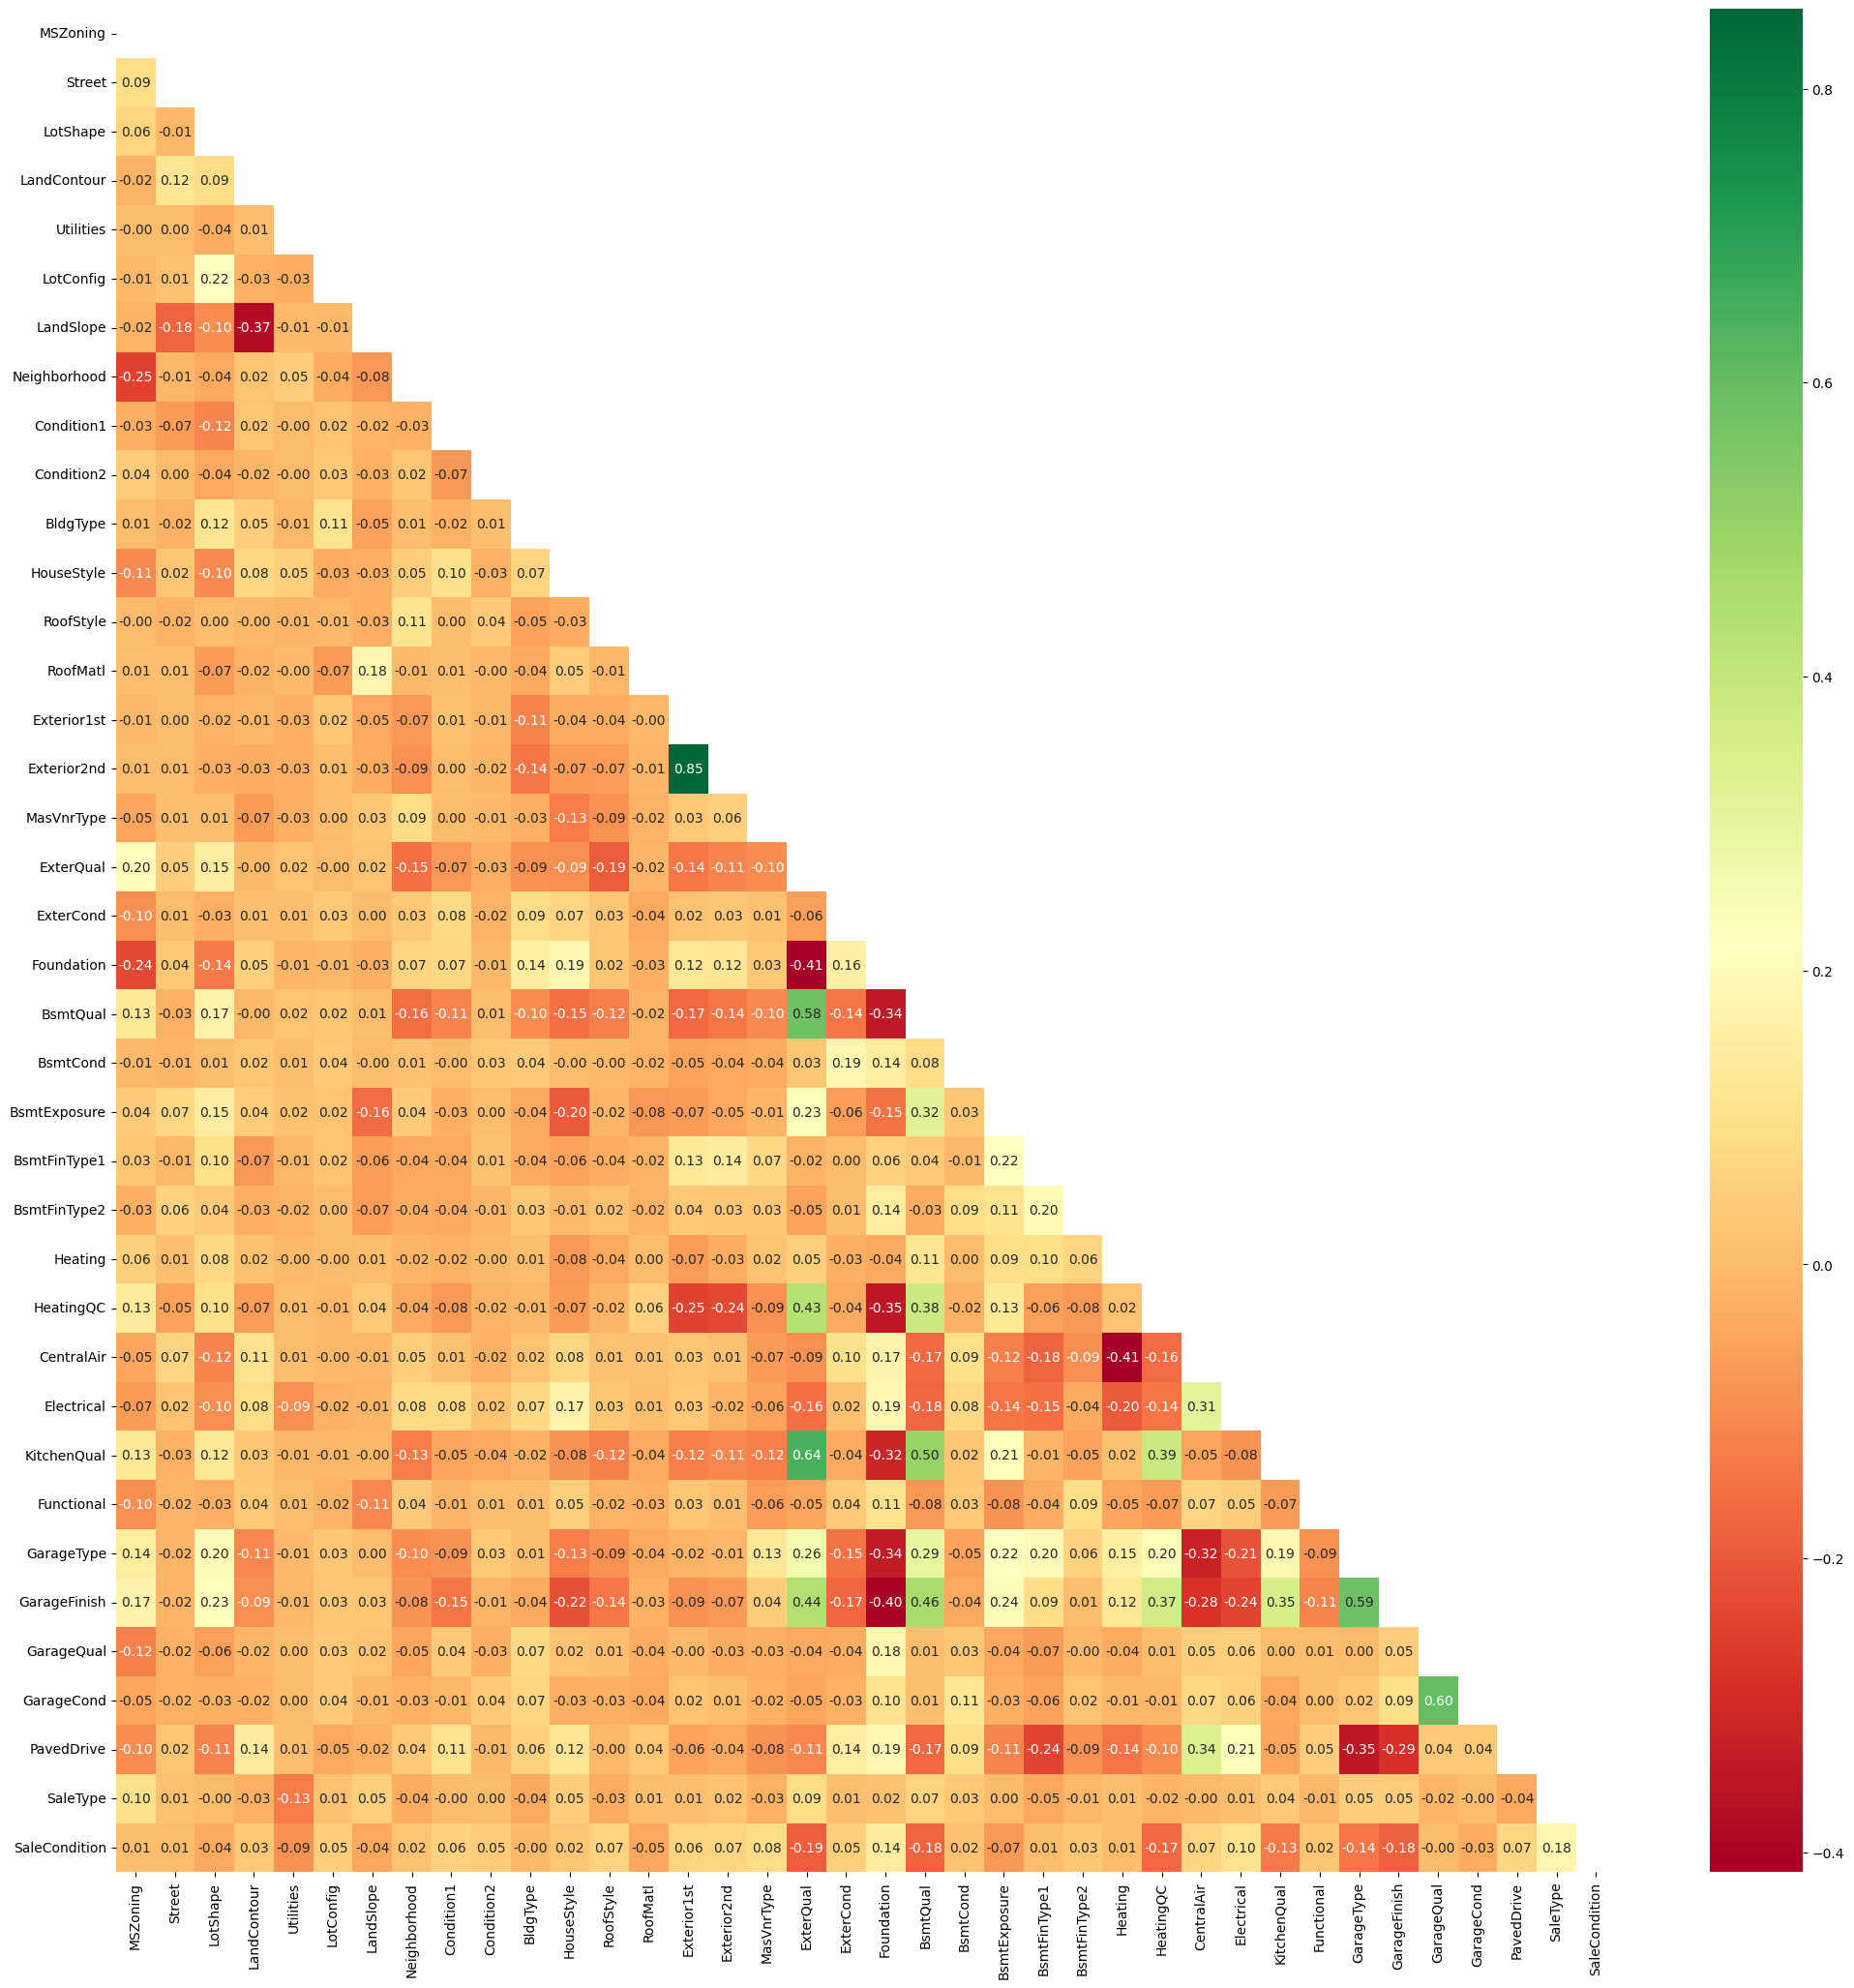

In [35]:
plt.figure(figsize=(25,25))
mask = np.triu(df_scaling[categorical_columns].corr())
sns.heatmap(df_scaling[categorical_columns].corr(),annot=True,fmt=".2f",cmap="RdYlGn",mask=mask)

- we could see the correlation matrix for the categorical variable and we could see the columns Exterior2nd,BsmtQual,KitchenQual,GarageFinish,GarageCond are having higer correlation so we could drop the columns

In [36]:
df_scaling.drop(columns =["Exterior2nd","BsmtQual","KitchenQual","GarageFinish","GarageCond"],inplace=True)

In [37]:
df_scaling.shape

(1460, 69)

# Exploratory data Analysis

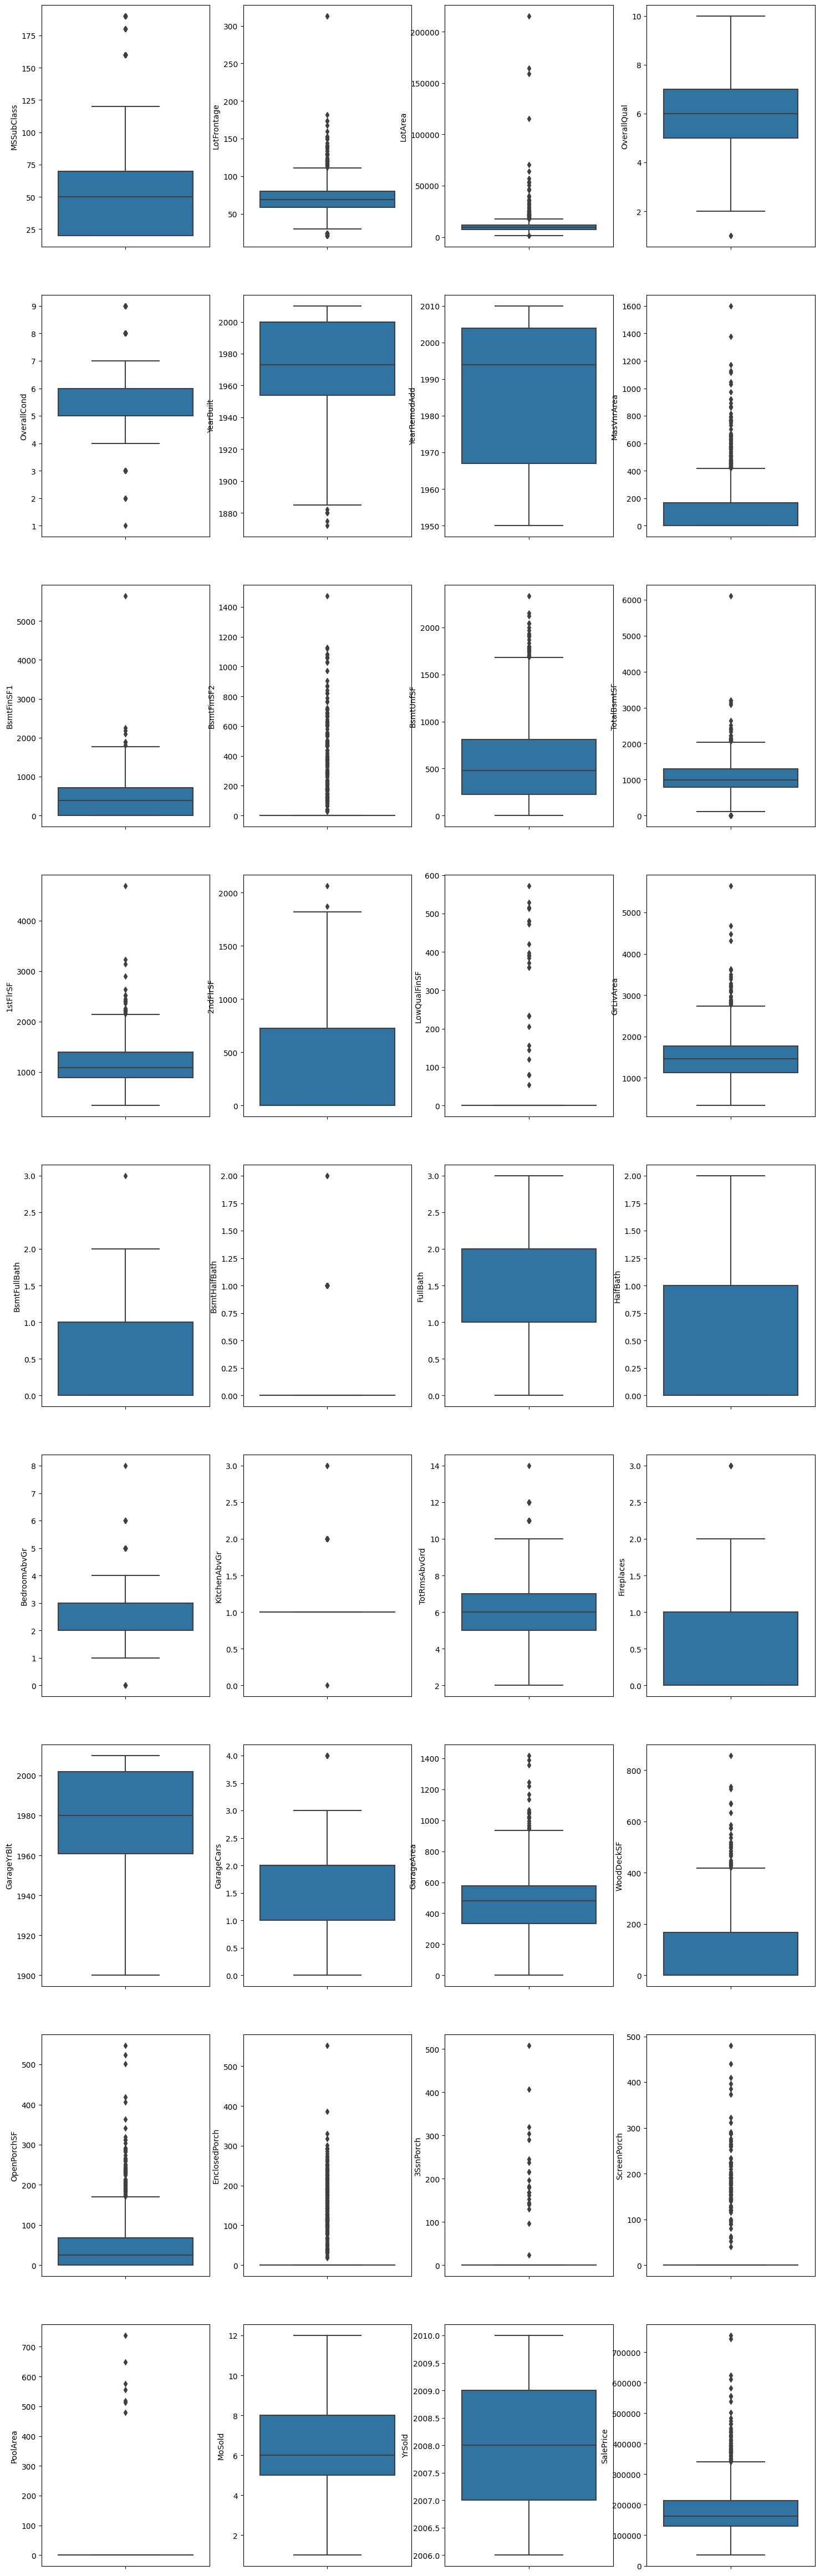

In [84]:
plt.figure(figsize=(18,60))

i = 1
for col in numeric_columns:
    plt.subplot(9,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

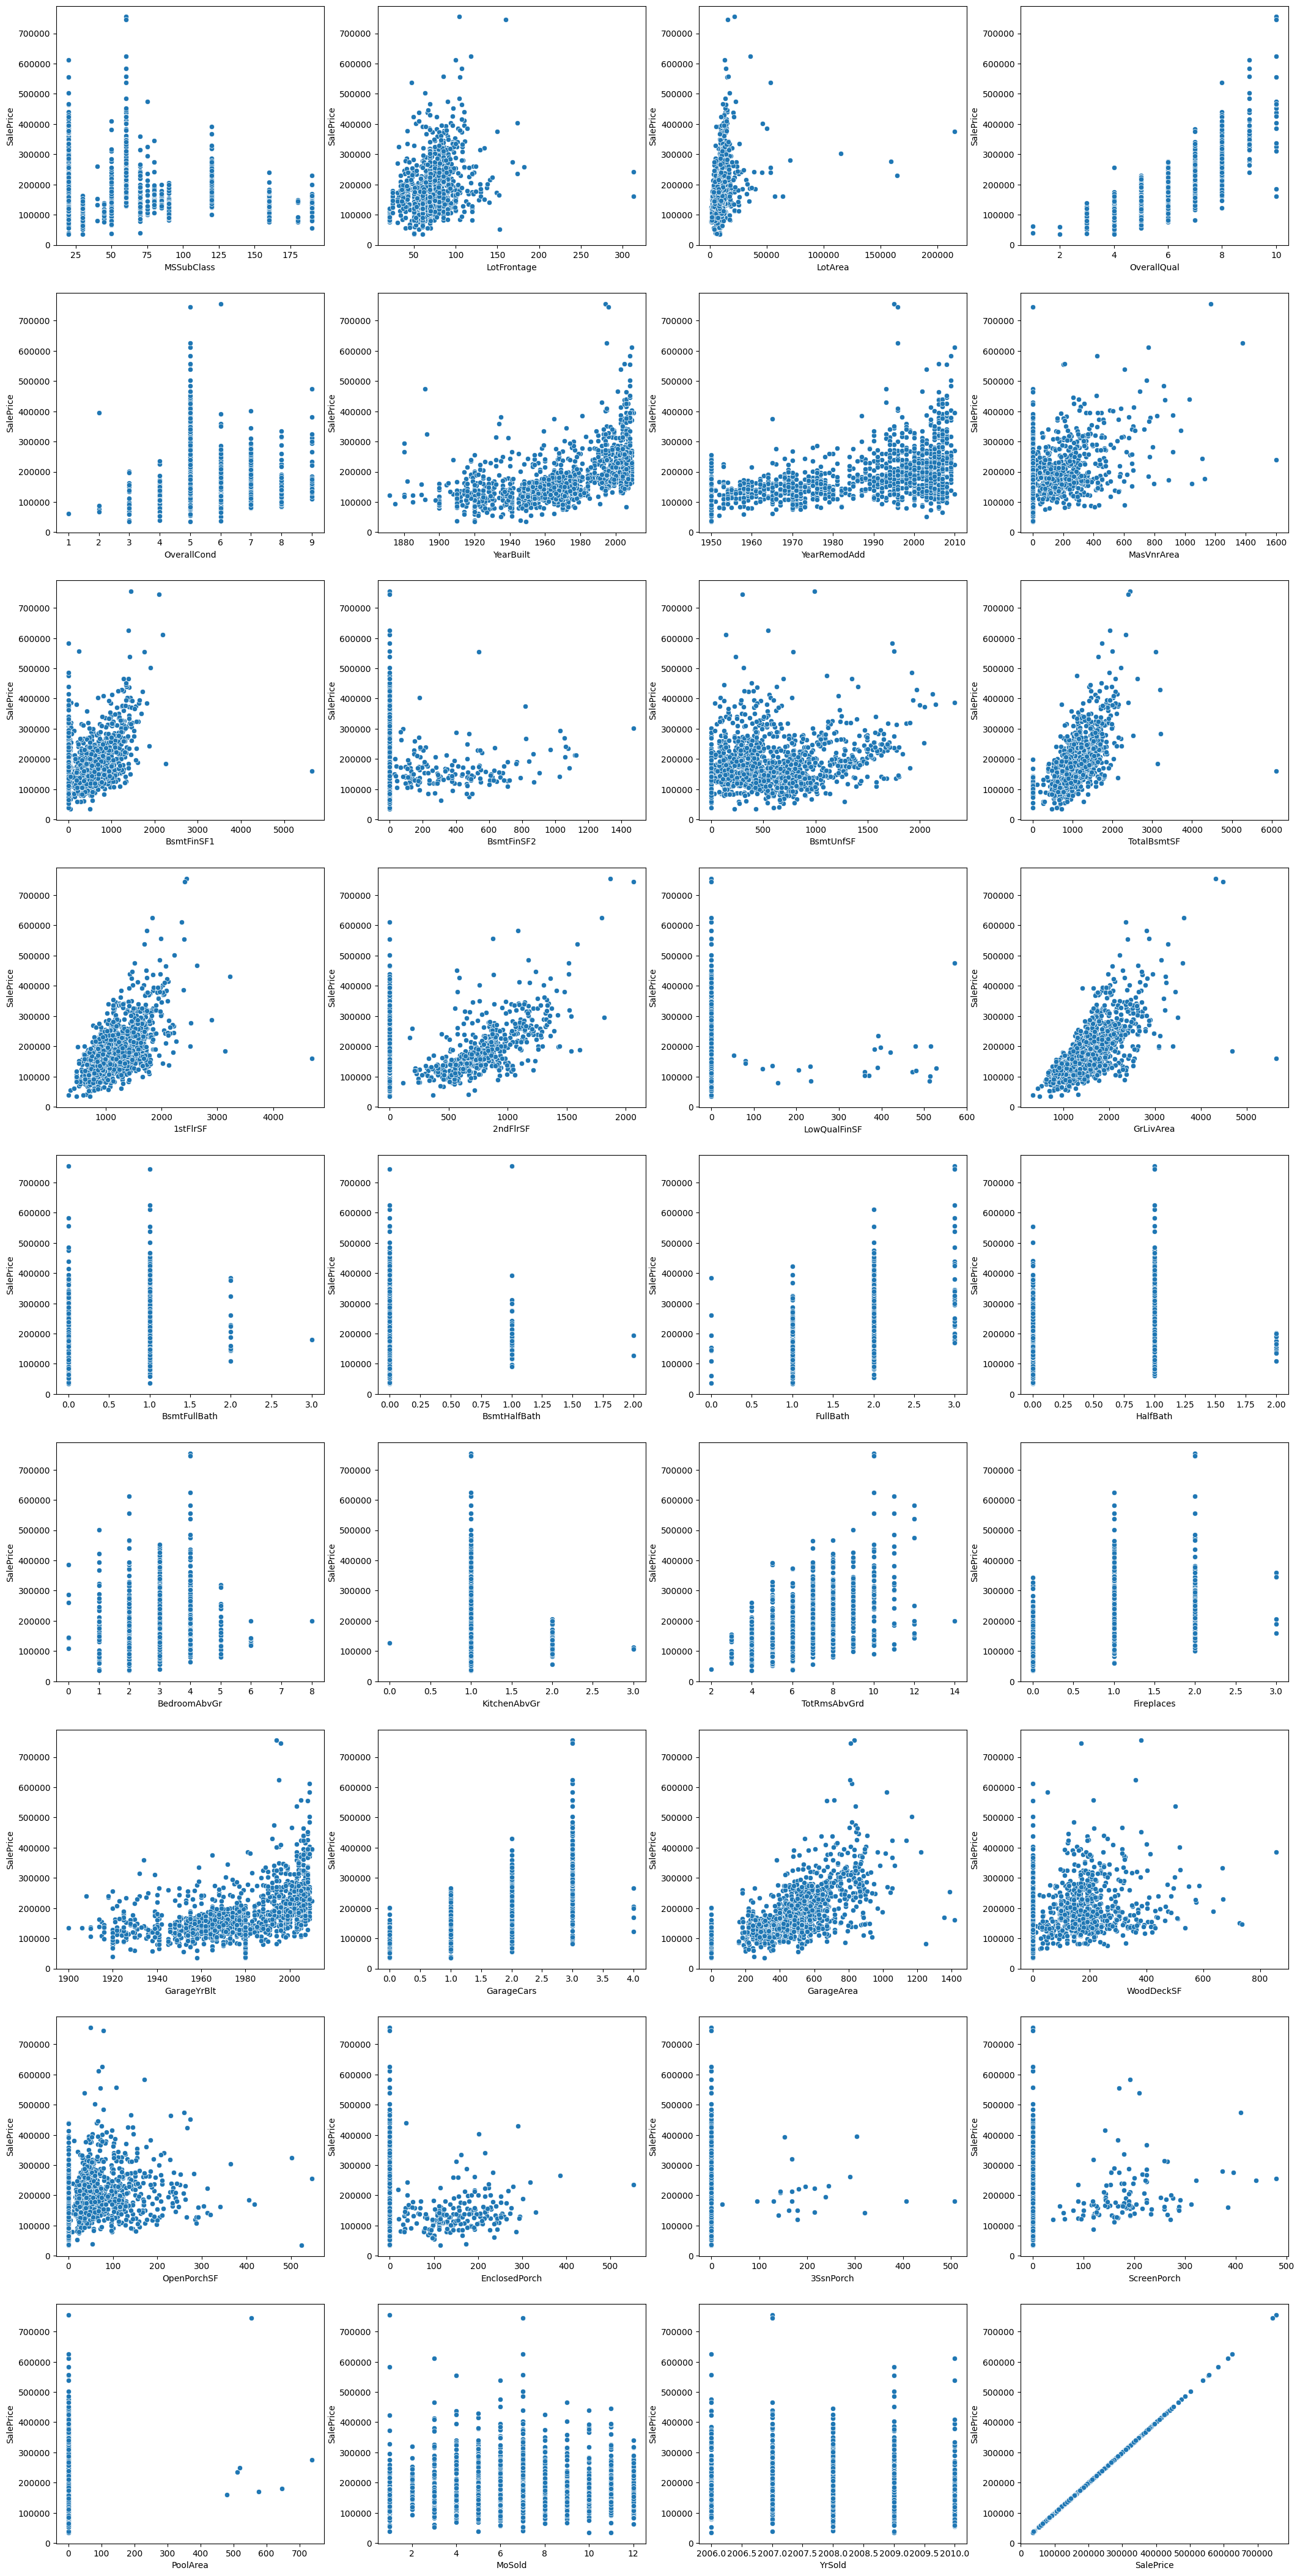

In [104]:
plt.figure(figsize=(26,60))

i = 1
for col in numeric_columns:
    plt.subplot(10,4,i)
    sns.scatterplot(y="SalePrice",x=col, data=df_label)
    i+=1

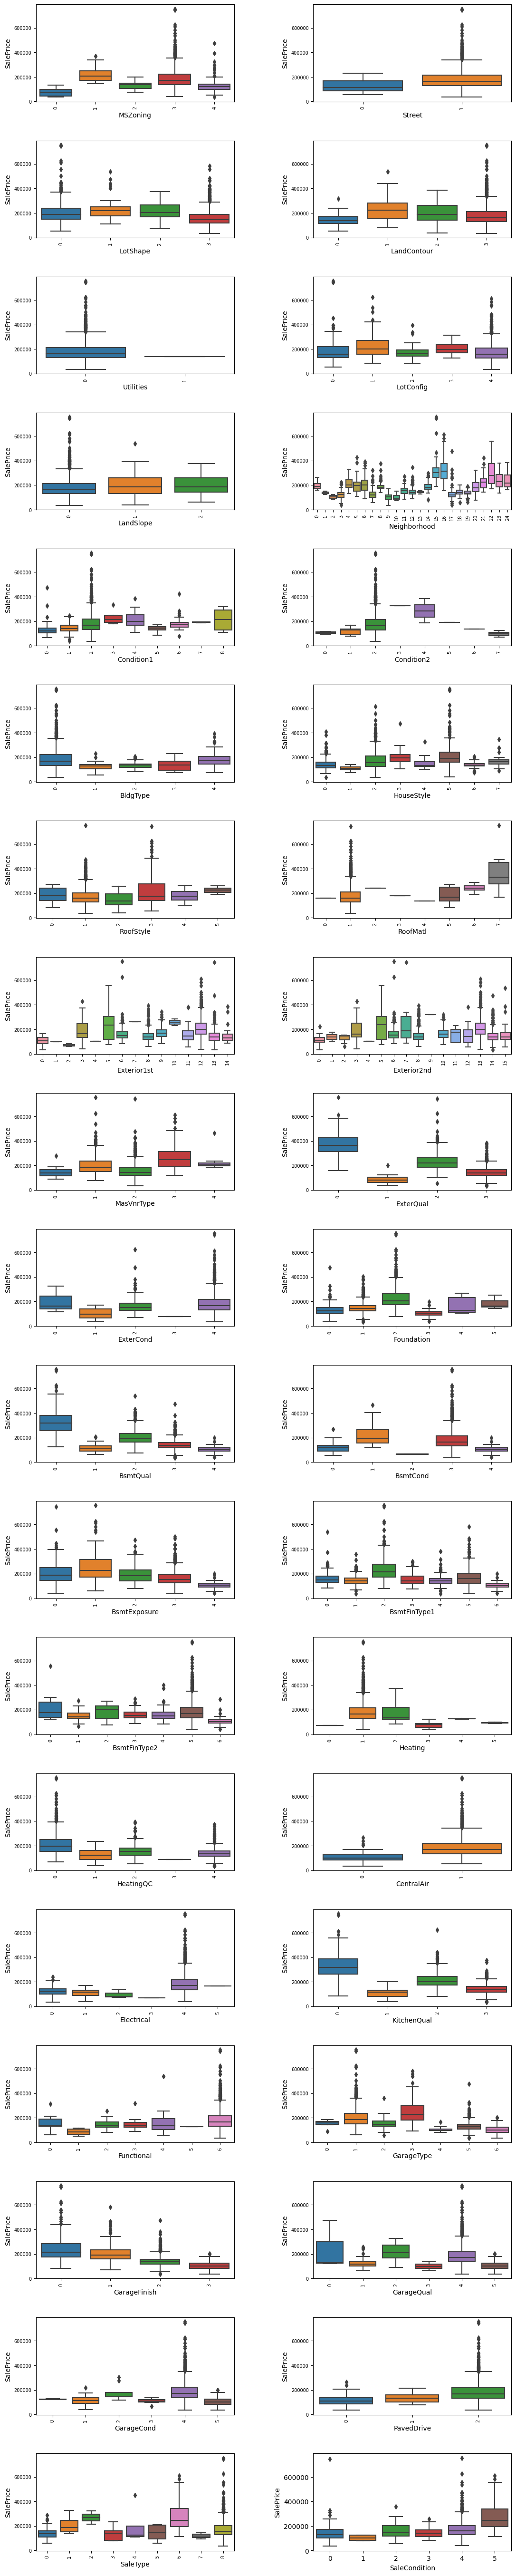

In [160]:
plt.figure(figsize=(25,650))

plt.subplots_adjust(left=0.1,
                    bottom=0.5,
                    right=0.5,
                    top=0.6,
                    wspace=0.4,
                    hspace=0.4)
i = 1
for col in categorical_columns:
    plt.xticks(rotation=90)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.subplot(23,2,i)
    sns.boxplot(x =col, y ='SalePrice', data = df_label)
    i+=1

# Model Building

In [127]:
model_data = df_scaling.copy()

In [128]:
y = model_data.pop("SalePrice")
x= model_data

In [129]:
# importing tarin_test_split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=.80,random_state=100)

In [130]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 68)
(292, 68)
(1168,)
(292,)


- we are trying with the basic linear regression model and see the r2_score as the metric

In [161]:
linear = LinearRegression()

linear.fit(x_train,y_train)
y_train_pred = linear.predict(x_train)
y_test_pred = linear.predict(x_test)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print(f" r2_train of the Linear Regression model is {round(r2_train*100,2)}%")

2023/07/26 22:54:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '812514cf26d643b9bfbd052a104a7025', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


 r2_train of the Linear Regression model is 80.86%


### Ridge and Lasso regression

### Ridge Regression

In [172]:
ridge = Ridge()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5
model_cv = GridSearchCV(
    estimator = ridge,
    param_grid = params,
    scoring = "neg_mean_squared_error",
    cv=folds,
    return_train_score=True,
    verbose=False)

model_cv.fit(x_train,y_train)

2023/07/26 23:00:24 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6e2cf9a2cf604d618b173dab074acae7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/07/26 23:00:29 INFO mlflow.sklearn.utils: Logging the 5 best runs, 23 runs will be omitted.


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=False)

In [173]:
model_cv.cv_results_

{'mean_fit_time': array([0.00667772, 0.0036943 , 0.00332747, 0.00326352, 0.00231204,
        0.00263758, 0.0027885 , 0.00391555, 0.00771508, 0.0060513 ,
        0.00276818, 0.00382152, 0.00419617, 0.00457625, 0.00615225,
        0.00486865, 0.0052237 , 0.00485139, 0.0043108 , 0.00308576,
        0.0027235 , 0.00276265, 0.00275545, 0.00262923, 0.00277457,
        0.00414629, 0.0026629 , 0.00319905]),
 'std_fit_time': array([0.00540628, 0.00124779, 0.00168567, 0.00143243, 0.00031629,
        0.00077763, 0.00114879, 0.00344054, 0.00290397, 0.00525416,
        0.00017292, 0.00204062, 0.00183187, 0.00182246, 0.00291398,
        0.00400144, 0.00261085, 0.00205447, 0.00213007, 0.00047551,
        0.0001178 , 0.00013757, 0.00015897, 0.0001585 , 0.00012549,
        0.00125314, 0.00013296, 0.0008032 ]),
 'mean_score_time': array([0.00240793, 0.00205307, 0.00234909, 0.00132847, 0.00115333,
        0.00120049, 0.00172243, 0.00146618, 0.00612593, 0.0036304 ,
        0.00162988, 0.00352936, 0.001821

In [180]:
best_value =model_cv.best_params_

In [181]:
ridge = Ridge(alpha=best_value["alpha"])

In [182]:
ridge.fit(x_train,y_train)

2023/07/26 23:01:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '300ab9d1b4ef4c78b6dd571435221553', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Ridge(alpha=3.0)

In [183]:
ridge_pred = ridge.predict(x_test)

In [184]:
r2_score(y_test,ridge_pred)

0.8282693330920163

### Lasso regression

In [52]:
lasso = Lasso()

folds = 5
model_cv_lasso = GridSearchCV(
    estimator = lasso,
    param_grid = params,
    scoring = "neg_mean_absolute_error",
    cv=folds,
    return_train_score=True,
    verbose=False)

model_cv_lasso.fit(x_train,y_train)


2023/07/26 01:23:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6a732a1ce1914ab2afc65eea6482ac5b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/07/26 01:23:27 INFO mlflow.sklearn.utils: Logging the 5 best runs, 23 runs will be omitted.


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=False)

In [53]:
model_cv_lasso.best_estimator_

Lasso(alpha=0.0001)

In [167]:
lasso_ = Lasso(alpha=0.0001)

lasso_.fit(x_train,y_train)
lasso_pred = ridge.predict(x_test)
lasso_r2 = r2_score(y_test,lasso_pred)

2023/07/26 22:56:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'afe02fdb8fe34725a8ecac4425c30fb6', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


In [168]:
print(lasso_r2)

0.8395100104292679


In [56]:
lasso_.coef_

array([-2.58952885e-02, -7.17538482e-04, -4.64922285e-03,  0.00000000e+00,
        9.73863682e-03, -2.58408519e-03,  6.71024494e-03, -0.00000000e+00,
        4.41874387e-04,  1.73355299e-02,  7.22105276e-04,  0.00000000e+00,
       -1.37051844e-02, -3.88014115e-03, -2.81757363e-03,  1.72051338e-01,
        3.02274534e-02,  2.91697920e-02,  1.32901628e-02,  3.28312115e-03,
        8.83078330e-03, -5.00553027e-04,  6.40417470e-03,  7.73485633e-02,
       -2.14743450e-02,  1.05638463e-03,  2.48045532e-03,  2.59088637e-03,
       -6.43189225e-03, -1.57297048e-03,  3.20475853e-02,  4.23102256e-04,
        2.38071645e-03, -0.00000000e+00,  1.12885047e-02, -7.46751620e-04,
       -1.88782359e-03,  0.00000000e+00, -7.03759486e-04,  7.42859873e-03,
        0.00000000e+00, -1.52299744e-02,  3.30725563e-01,  4.30398504e-02,
        6.12576647e-04,  1.52188809e-02,  4.46473726e-03, -3.59752348e-02,
       -1.47692865e-02,  3.11567194e-02,  6.19194944e-03,  3.19860395e-02,
        1.75488558e-04, -

### Combining all the model Outputs

In [57]:
# Observation

model_output = pd.DataFrame(index=x.columns)

In [58]:
model_output["linear"] = linear.coef_
model_output["ridge"] = ridge.coef_
model_output["lasso"] = lasso_.coef_

In [59]:
pd.set_option('display.max_rows', None)
model_output.sort_values("lasso",ascending=True)

,linear,ridge,lasso
BedroomAbvGr,-6.844711e-02,-5.392041e-02,-0.035975
MSSubClass,-2.894366e-02,-2.772224e-02,-0.025895
ExterQual,-2.088066e-02,-2.188616e-02,-0.021474
LowQualFinSF,6.815045e+10,-8.085807e-03,-0.015230
KitchenAbvGr,-4.560852e-02,-4.048058e-02,-0.014769
Condition2,-1.746538e-02,-1.701379e-02,-0.013705
YrSold,-1.013184e-02,-9.764949e-03,-0.008549
BsmtExposure,-5.890718e-03,-6.273432e-03,-0.006432
LotFrontage,-4.687171e-02,-3.126585e-02,-0.004649
MoSold,-5.516052e-03,-5.638935e-03,-0.003937


# Conclusion

- The r2_score of the linear regression Model is 80%
- The r2_score of the Ridge regression Model is 82% with the Alpha value of 0.3
- The r2_score of the Lasso regression Model is 83.5% with the Alpha value of 0.0001

# Questions

## Question 3 : Removing teh top 5 features and re-running the model again

In [112]:
lasso_top_5_features = list(model_output.sort_values(by="lasso",ascending=False).head(5).index)

In [113]:
lasso_top_5_features

['GrLivArea', 'OverallQual', 'MasVnrArea', 'GarageCars', 'BsmtFullBath']

In [133]:
x_train_lasso_question = x_train
x_test_lasso_question = x_test
x_train_lasso_question.drop(columns = lasso_top_5_features,inplace=True,axis=1)
x_test_lasso_question.drop(columns = lasso_top_5_features,inplace=True,axis=1)


In [141]:
lasso_1 = Lasso()
folds = 5

model_cv_lasso_for_question  = GridSearchCV(
    estimator = lasso_,
    param_grid = params,
    scoring = "neg_mean_absolute_error",
    cv=folds,
    return_train_score=True,
    verbose=False)

model_cv_lasso_for_question.fit(x_train_lasso_question,y_train)

2023/07/26 17:05:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ac716a70ef774e11851533c2a5ccbaf5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/07/26 17:05:21 INFO mlflow.sklearn.utils: Logging the 5 best runs, 23 runs will be omitted.


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=False)

In [142]:
model_cv_lasso_for_question.best_estimator_


Lasso(alpha=0.0001)

In [151]:
lasso_for_question = Lasso(alpha=0.0001)

lasso_for_question.fit(x_train_lasso_question,y_train)
lasso_question = pd.DataFrame(index=x_train_lasso_question.columns)
lasso_question["removed_top_5_columns"] = lasso_for_question.coef_
lasso_question.sort_values(by="removed_top_5_columns",ascending=False).head(5)

2023/07/26 17:13:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5719dc043c794e2d9e0c0ae0bed5164a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


,removed_top_5_columns
1stFlrSF,0.316191
2ndFlrSF,0.162403
TotalBsmtSF,0.084614
BsmtFinSF1,0.077619
GarageArea,0.075036
